In [1]:
### --- Algorithme de Grover --- ###

In [3]:
### --- Librairies --- ###
import numpy as np
import matplotlib.pyplot as plt
# Import acces Ordi Quantique IBM & Simulateur Aer
from qiskit import IBMQ, BasicAer
# Récupère les ordi IBM les plus disponibles
from qiskit.providers.ibmq import least_busy
# Importation des circuits quantiques, registre de byte classique & quantique, execution des calcs
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
# Outils visualisation qiskit
from qiskit.tools.visualization import plot_histogram

In [4]:
### --- main code --- ###

In [5]:
# Fonction d'inversion d'amplitude (Phase)
def phase_oracle(circuit,register):
    circuit.cz(qr[2],qr[0]) # 101 en états de qbits
    circuit.cz(qr[2],qr[1]) # 110 en états de qbits

In [7]:
 ## Fonction d'inversion d'amplitude sur N qbits
def n_controlled_Z(circuit, controls, target):
    if len(controls) > 2:
        pass # On ne gère pas les controleurs supérieurs à 2
    elif len(controls) == 1:
        circuit.h(target) # Mise en superposition des qbits
        circuit.cx(controls[0], target) # Intrication bits control 0 et target
        circuit.h(target) # Deuxième porte hadamard
    elif len(controls) == 2:
        circuit.h(target) # Mise en superposition des qbits
        circuit.ccx(controls[0], controls[1], target) # Triple Intrication bits control 0,1 et target
        circuit.h(target) # Deuxième porte hadamard

In [31]:
# Fonctions inversion d'amplitude (Rotation symétrie(horizon,moyenne amplitude) par rapport à des axes)
def inversion_average(circuit, register, n, barriers):
    circuit.h(register)
    circuit.x(register) # Porte de rotation (dans la sphere de block) pour la symétrie
    if barriers: # Pour faire beau
        circuit.barrier()
    
    n_controlled_Z(circuit,[register[j] for j in range(n-1)], register[n-1])
    if barriers:     
        circuit.barrier()
    
    circuit.x(register)
    circuit.h(register)

In [32]:
# Les barriers , pour faire beau sur les circuits
barriers=True

In [33]:
# Test de Grover
qr = QuantumRegister(3) # Création d'un circuit avec 3 qbits
cr = ClassicalRegister(3) # Création de 3 bits pour les mesures

In [34]:
# Création du circuit de Grover
groverCircuit = QuantumCircuit(qr,cr) # Creation avec Register Quantique et Classic
groverCircuit.h(qr) # Mise en superposition de tous les qbits

In [35]:
# Affichage visuel des barrier
if barriers:
    groverCircuit.barrier()

In [36]:
# Phase d'oracle : inversion de l'amplitude (multiplication par -1)
phase_oracle(groverCircuit, qr)
# Un peu de barriers
if barriers:
    groverCircuit.barrier()

In [37]:
# La magie de Grover !
# Symétrie par rappport à la moyenne des amplitudes N qbits
inversion_average(groverCircuit, qr, 3, barriers) # N = 3 ici 
# Encore plus de barriers
if barriers:
    groverCircuit.barrier()

In [38]:
# Mesure du circuit de Grover pour avoir un résultat 
groverCircuit.measure(qr,cr) 

In [39]:
# On dessine le circuit
groverCircuit.draw()

┌───┐ ░        ░ ┌───┐┌───┐ ░                 ░ ┌───┐┌───┐ ░ ┌─┐      
q13_0: ┤ H ├─░──■─────░─┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├─░─┤M├──────
       ├───┤ ░  │     ░ ├───┤├───┤ ░        │        ░ ├───┤├───┤ ░ └╥┘┌─┐   
q13_1: ┤ H ├─░──┼──■──░─┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├─░──╫─┤M├───
       ├───┤ ░  │  │  ░ ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤ ░  ║ └╥┘┌─┐
q13_2: ┤ H ├─░──■──■──░─┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├─░──╫──╫─┤M├
       └───┘ ░        ░ └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘ ░  ║  ║ └╥┘
 c1: 3/══════════════════════════════════════════════════════════════╩══╩══╩═
                                                                     0  1  2

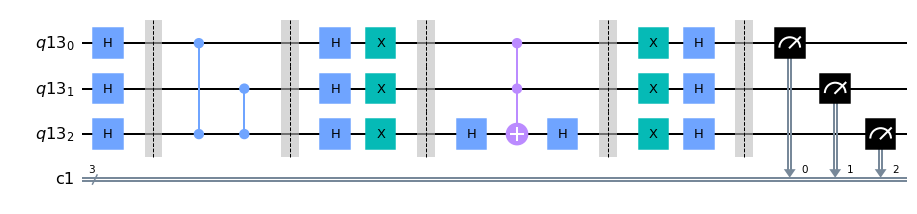

In [40]:
# Encore plus beau pour l'affichage
groverCircuit.draw(output="mpl")

In [41]:
# Le curcuit est terminé, maintenant on lance le calcule de Grover
# Simulateur car IBMQ trop d'attente
qasm_sim = BasicAer.get_backend('qasm_simulator')

In [42]:
# On lance le calcule plusieurs fois
shots = 2048
results = execute(groverCircuit, backend=qasm_sim, shots=shots).result()

In [43]:
# On récupère les resultats
answer = results.get_counts()

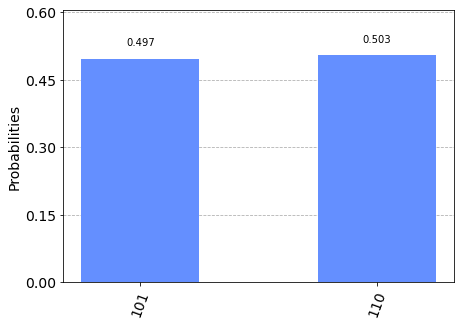

In [44]:
# Affichage du résultat
plot_histogram(answer)

In [45]:
# Remarque on obtient deux résultats possible 101 et 110
# On n'obtient pas 000 111 011 100 001 etc ..
# Car le 3ème qbit et utilisé pour superposer les deux autres

In [47]:
#### ---- Tentative avec un IBMQ ---- ####
# Connexion avec le token (si pas token --> IBMQ.save_account(token))
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-07 10:04:36,206: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [48]:
# On se branche sur les providers
provider = IBMQ.get_provider(hub='ibm-q') # Le Hub est donné pendant la connexion juste avant en output

In [66]:
# On va utiliser l'ordi le plus libre et qui n'est pas un simulateur et qui a plus de 3 qbits
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator and x.status().operational==True))
print(backend)

ibmq_quito


In [67]:
# On lance le calcul de Grover sur armonk
from qiskit.tools.monitor import job_monitor

In [68]:
shots = 2048
job = execute(groverCircuit, backend=backend, shots=shots)
job_monitor(job, interval=2)

Job Status: job has successfully run


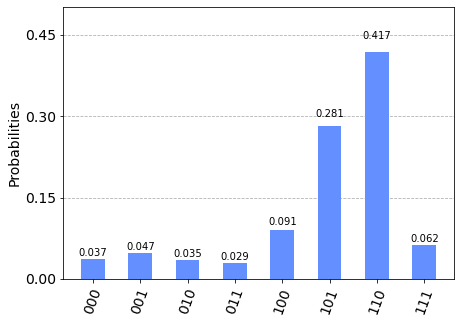

In [69]:
# On récupère les résultats
results = job.result()
res = results.get_counts(groverCircuit)
plot_histogram(res)

In [ ]:
# Remarque on a nos 2 résultats attendus mais avec des erreurs quantique (bruits quantique).
# 